<a href="https://colab.research.google.com/github/mjbernalv/trabajo2-si7006-252-perfilamiento/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Análisis exploratorio de los datos </center>

In [ ]:
!apt-get update
!apt-get install openjdk-11-jdk -y

## Librerías

In [ ]:
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct, avg, col, sum as spark_sum

## Lectura de datos

In [ ]:
drive.mount('/content/drive')
ruta_base = "/content/drive/MyDrive/Dataset PI/Refined/"
trusted_path = ruta_base + "trusted_data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spark = SparkSession.builder \
    .appName("eda-spark") \
    .getOrCreate()

In [ ]:
spark_df = spark.read.csv(trusted_path, header=True, inferSchema=True)
spark_df.show(5)

root
 |-- codCliente: integer (nullable = true)
 |-- codPoliza: integer (nullable = true)
 |-- formaPagoVigencia: string (nullable = true)
 |-- valorTotal: double (nullable = true)
 |-- Valor_Total_Periodico: double (nullable = true)
 |-- fechaInicioVigencia: date (nullable = true)
 |-- fechaFinVigencia: date (nullable = true)
 |-- estado: string (nullable = true)
 |-- OpracionesGrupo: string (nullable = true)
 |-- Vigencia: string (nullable = true)
 |-- EstadoRenovacionesinicio: string (nullable = true)
 |-- ciudad: string (nullable = true)
 |-- tipoVinculacion: string (nullable = true)
 |-- Edad: integer (nullable = true)
 |-- Tipo_Empresa: string (nullable = true)
 |-- tomador: string (nullable = true)
 |-- nomProducto: string (nullable = true)
 |-- nomGrupoEmpresarial: string (nullable = true)
 |-- Ramo: string (nullable = true)
 |-- orden_vigencia: integer (nullable = true)

+----------+---------+-----------------+----------+---------------------+-------------------+--------------

## Información general

In [ ]:
# Número total de registros
print(f"Número total de registros: {spark_df.count()}")

# Esquema del DataFrame
spark_df.printSchema()

Número total de registros: 81758


## Estadísticas descriptivas

In [74]:
# Estadísticas descriptivas para columnas numéricas
spark_df.select([col for col, dtype in spark_df.dtypes if dtype in ['int', 'double', 'float', 'long']]).describe().show()

+-------+------------------+-----------------+--------------------+---------------------+------------------+--------------+
|summary|        codCliente|        codPoliza|          valorTotal|Valor_Total_Periodico|              Edad|orden_vigencia|
+-------+------------------+-----------------+--------------------+---------------------+------------------+--------------+
|  count|             81758|            81758|               81758|                81758|             81758|         81758|
|   mean|128796.03280412925|124621.3013405416|   4735777.362765723|    2539776.414499862| 27.69540595415739|           1.0|
| stddev|  76173.5129703256|71950.65781835352|2.6996539147421867E7| 2.2078056238878995E7|24.629428069159747|           0.0|
|    min|                37|                9|                 1.0|                  1.0|                 0|             1|
|    max|            267485|           227235|       2.782820634E9|        2.782820634E9|                99|             1|
+-------

## Exploración de datos

In [ ]:
# Contar valores nulos por columna
spark_df.select([spark_sum(col(c).isNull().cast("integer")).alias(c) for c in spark_df.columns]).show()

+----------+---------+-----------------+----------+---------------------+-------------------+----------------+------+---------------+--------+------------------------+------+---------------+----+------------+-------+-----------+-------------------+----+--------------+
|codCliente|codPoliza|formaPagoVigencia|valorTotal|Valor_Total_Periodico|fechaInicioVigencia|fechaFinVigencia|estado|OpracionesGrupo|Vigencia|EstadoRenovacionesinicio|ciudad|tipoVinculacion|Edad|Tipo_Empresa|tomador|nomProducto|nomGrupoEmpresarial|Ramo|orden_vigencia|
+----------+---------+-----------------+----------+---------------------+-------------------+----------------+------+---------------+--------+------------------------+------+---------------+----+------------+-------+-----------+-------------------+----+--------------+
|         0|        0|                0|         0|                    0|                  0|               0|     0|              0|       0|                       0|     0|              0|   

In [76]:
# Contar registros por 'Ramo'
spark_df.groupBy('Ramo').count().show()

+-------------+-----+
|         Ramo|count|
+-------------+-----+
|        Salud|21760|
|         Vida|19588|
|        Autos|18531|
| Cumplimiento|11450|
|Patrimoniales|10188|
|        Otros|  241|
+-------------+-----+



In [77]:
# Contar registros por 'nomGrupoEmpresarial'
spark_df.groupBy('nomGrupoEmpresarial').count().show()

+-------------------+-----+
|nomGrupoEmpresarial|count|
+-------------------+-----+
|          Previsora|   74|
|            Allianz| 5221|
|           S Estado|  190|
|            Berkley|    2|
|               NULL|  217|
|          Confianza|    2|
|             Mapfre|  126|
|                Hdi| 2575|
|            Coomeva|    3|
|         La Equidad|   41|
|            Mundial|   44|
|             Zurich|    8|
|                Sbs|  477|
|            Skandia|    1|
|          Colpatria|  164|
|          48 Hooras|    4|
|               Sura|61417|
|          Solidaria| 1588|
|            Bolivar| 9586|
|               Bbva|   13|
+-------------------+-----+
only showing top 20 rows



## Matriz de correlación

Matriz de Correlación:


,codCliente,codPoliza,valorTotal,Valor_Total_Periodico,Edad,orden_vigencia
codCliente,1.000000,0.839936,-0.001000,-0.008914,-0.177435,NaN
codPoliza,0.839936,1.000000,-0.005557,0.002230,-0.260610,NaN
valorTotal,-0.001000,-0.005557,1.000000,0.842957,-0.013385,NaN
Valor_Total_Periodico,-0.008914,0.002230,0.842957,1.000000,-0.042271,NaN
Edad,-0.177435,-0.260610,-0.013385,-0.042271,1.000000,NaN
orden_vigencia,NaN,NaN,NaN,NaN,NaN,NaN


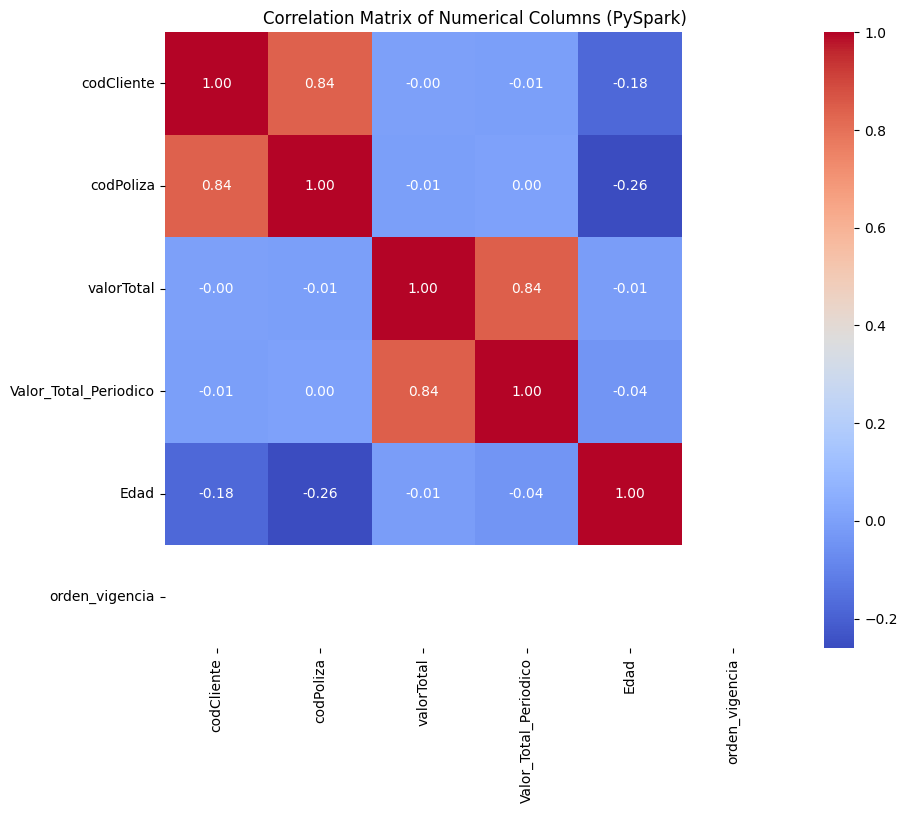

In [ ]:
# Calcular la matriz de correlación para columnas numéricas
numeric_cols = [col for col, dtype in spark_df.dtypes if dtype in ['int', 'double', 'float', 'long']]
corr_matrix = spark_df.select(numeric_cols).toPandas().corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns (PySpark)')
plt.show()

## Gráficos de dispersión

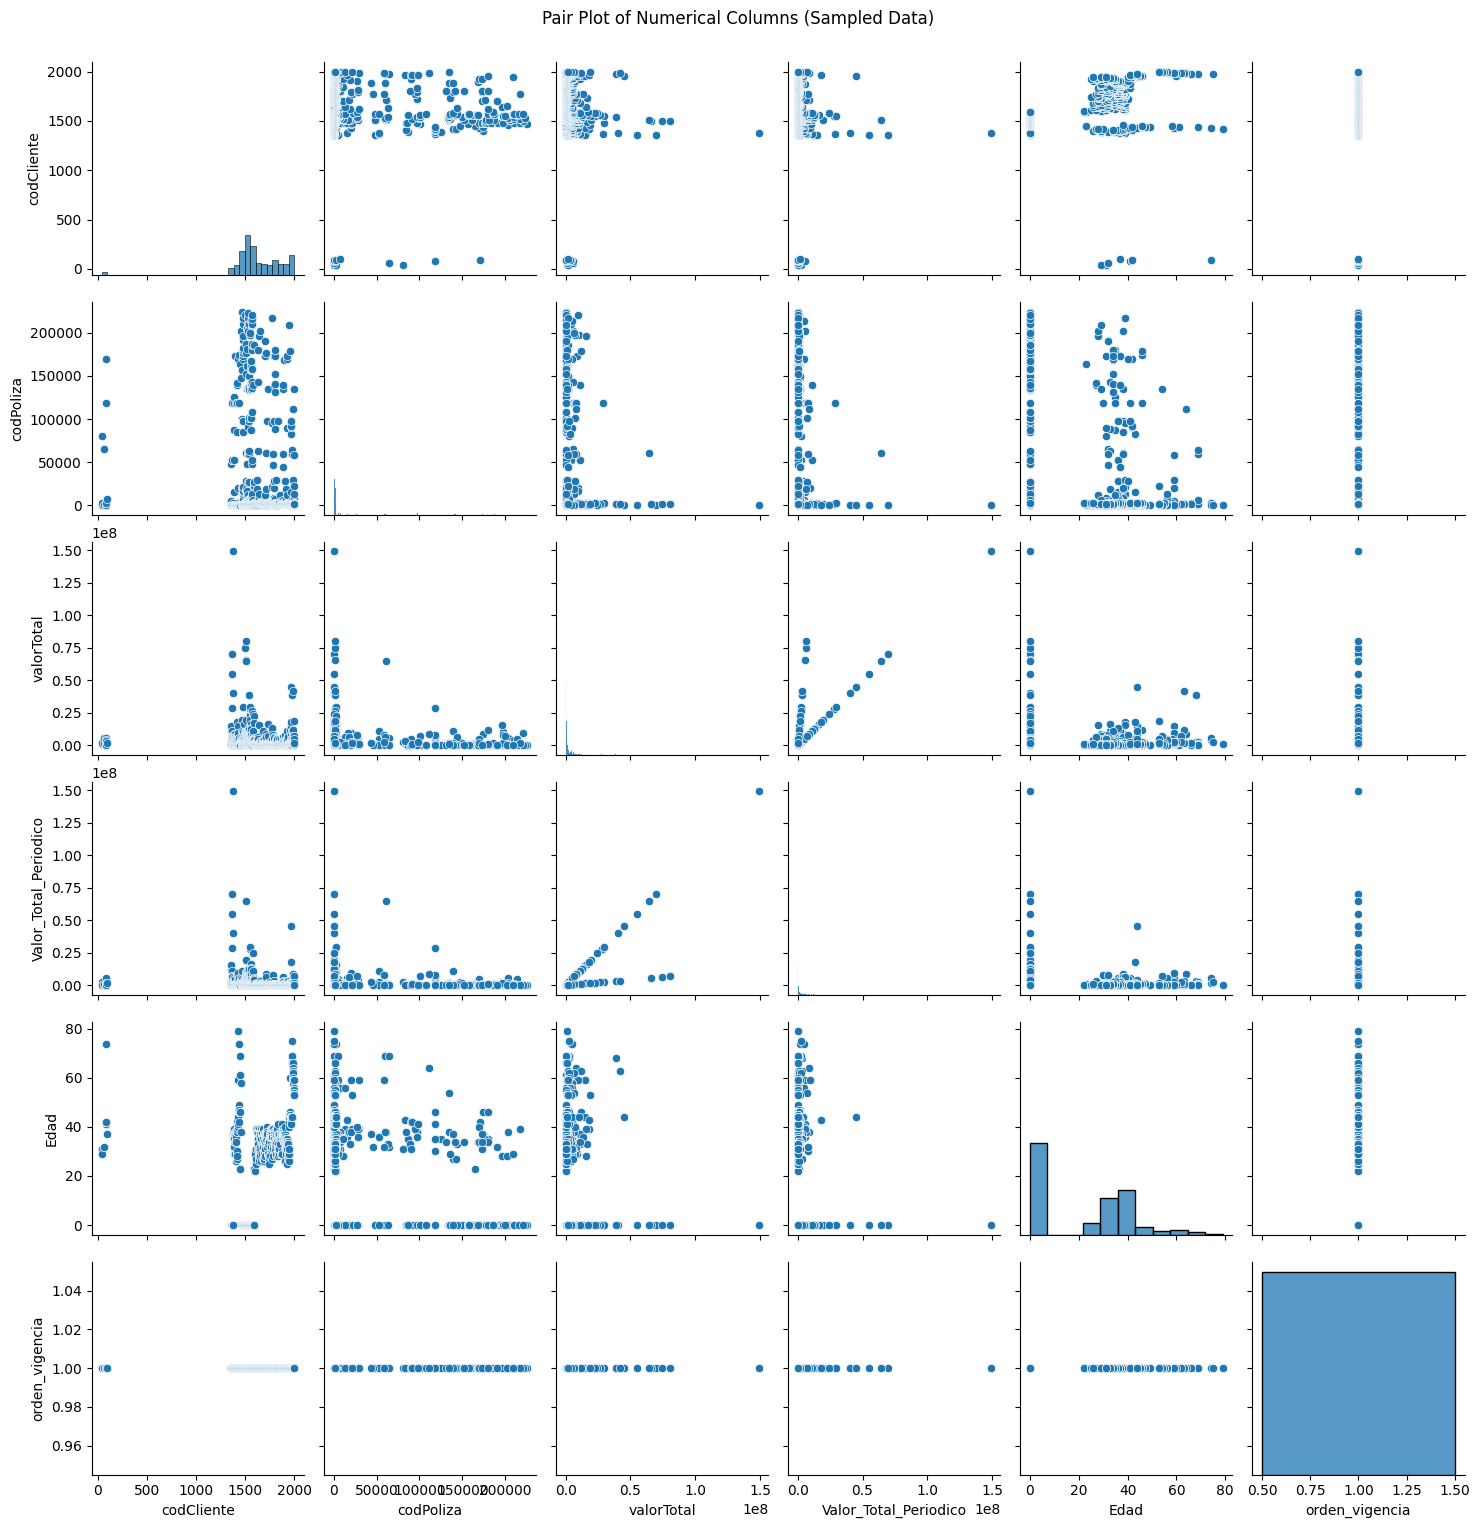

In [ ]:
sample_spark_df = spark_df.select(numeric_cols).limit(1000).toPandas()

sns.pairplot(sample_spark_df)
plt.suptitle('Pair Plot of Numerical Columns (Sampled Data)', y=1.02)
plt.show()

## Promedio de registros por cliente, registros por póliza y pólizas por cliente

In [ ]:
# Promedio de registros por cliente
avg_records_per_client_spark = spark_df.groupBy('codCliente').count().select(avg('count')).first()[0]
print(f"Promedio de registros por cliente: {avg_records_per_client_spark:.2f}")

# Promedio de registros por póliza
avg_records_per_poliza_spark = spark_df.groupBy('codPoliza').count().select(avg('count')).first()[0]
print(f"Promedio de registros por póliza: {avg_records_per_poliza_spark:.2f}")

# Promedio de pólizas por cliente
avg_policies_per_client_spark = spark_df.groupBy('codCliente').agg(countDistinct('codPoliza').alias('policy_count')).select(avg('policy_count')).first()[0]
print(f"Promedio de pólizas por cliente: {avg_policies_per_client_spark:.2f}")

Promedio de registros por cliente (PySpark): 1.58
Promedio de registros por póliza (PySpark): 1.00
Promedio de pólizas por cliente (PySpark): 1.58
